In [1]:
%load_ext autoreload
import import_ipynb
import functions
%autoreload 2
import csv
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.cm as c
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.special import gammaln, factorial

# Example: how to perform a run

In [5]:
N=100
p=0.1
G = nx.gnp_random_graph(N, p, directed=True)
f = 0.41
observations = functions.create_noisy_copies(graph=G, K=2, f=f)
functions.mcmc_paraltemp(observations, f, stop=False, max_mcmc_steps=100, n_replicas=20, verbose=True)

Progress ---> 5.0 %
Progress ---> 10.0 %
Progress ---> 15.0 %
Progress ---> 20.0 %
Progress ---> 25.0 %
Progress ---> 30.0 %
Progress ---> 35.0 %
Progress ---> 40.0 %
Progress ---> 45.0 %
Progress ---> 50.0 %
Progress ---> 55.0 %
Progress ---> 60.0 %
Progress ---> 65.0 %
Progress ---> 70.0 %
Progress ---> 75.0 %
Progress ---> 80.0 %
Progress ---> 85.0 %
Progress ---> 90.0 %
Progress ---> 95.0 %
Progress ---> 100.0 %


## This will save a .csv file with the results of the run.

# Section $3.2.2$: Plot Energy $f=0.2$

In [93]:
file_path = "results_0.2_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "MCMC Steps":
            mcmc_total_steps = int(row[1])
        
        elif row[0] == "Replicas":
            n_replicas = int(row[1])
            
        elif row[0] == "H_min and H_true":
            H_min,H_true = float(row[1]),float(row[2])
            
        elif row[0].startswith("Replica"):
            T.append(float(row[1]))
            energies.append([float(H) for H in row[2:]])

C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors
C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'


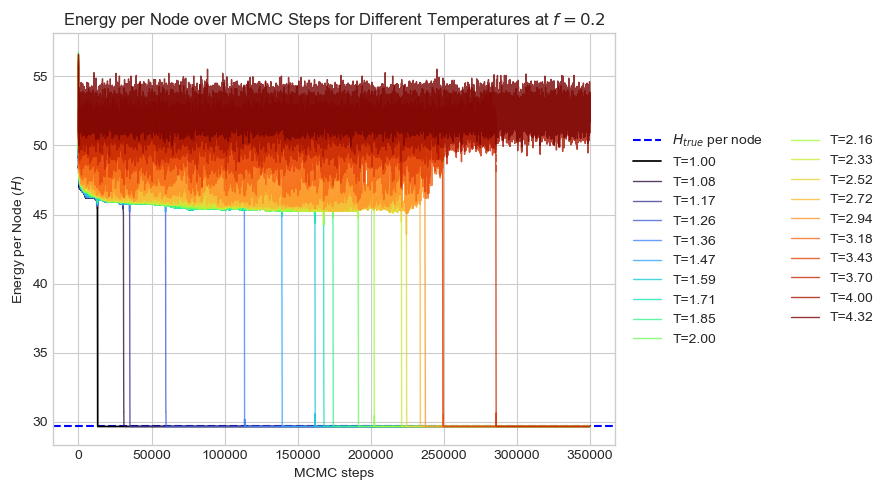

In [100]:
steps = len(energies[0])
        
# Plot energies.
plt.figure(figsize=(11,5))
plt.title(f"Energy per Node over MCMC Steps for Different Temperatures at $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("Energy per Node ($H$)")

# Plot the true energy as a reference.
plt.axhline(y=H_true, color='blue', linestyle='--', label="$H_{true}$ per node")

colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors

# Or, if you want to ensure T=1.0 is black and use a colormap for others:
num_other_replicas = n_replicas - 1 if 1.0 in T else n_replicas
if num_other_replicas > 0:
    other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'
else:
    other_colors = None # Handle case where only T=1.0 exists

color_idx = 0
for j in range(n_replicas):
    label_text = f'T={T[j]:.2f}' # Format temperature to 2 decimal places for consistency

    if T[j] == 1.0:
        plt.plot(range(steps), energies[j], color='black', label=label_text, linewidth=1.25) # Make T=1 distinct
    else:
        if other_colors:
            # Use a color from the 'other_colors' map
            current_color = other_colors(color_idx / (num_other_replicas -1 if num_other_replicas > 1 else 1) )
            plt.plot(range(steps), energies[j], color=current_color, label=label_text, alpha=0.8, linewidth=1.0)
            color_idx += 1
        else: # Should not happen if T[j] != 1.0 and num_other_replicas is 0, but as a fallback
            plt.plot(range(steps), energies[j], label=label_text, alpha=0.8, linewidth=1.0)


# Adjust legend:
# If too many lines, consider placing legend outside the plot or reducing font size further.
# Or, as suggested before, faceting might be a better long-term solution.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1 if n_replicas < 15 else 2)

image_path = "plot" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.tight_layout(rect=[0, 0, 0.82, 1]) # Adjust layout to make space for legend if it's outside
plt.savefig(image_path, bbox_inches='tight')  # Save as a PNG file, bbox_inches='tight' helps fit legend

# Section $3.2.2$: Plot Energy $f=0.28$

In [101]:
file_path = "results_0.28_3.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "MCMC Steps":
            mcmc_total_steps = int(row[1])
        
        elif row[0] == "Replicas":
            n_replicas = int(row[1])
            
        elif row[0] == "H_min and H_true":
            H_min,H_true = float(row[1]),float(row[2])
            
        elif row[0].startswith("Replica"):
            T.append(float(row[1]))
            energies.append([float(H) for H in row[2:]])

C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors
C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'


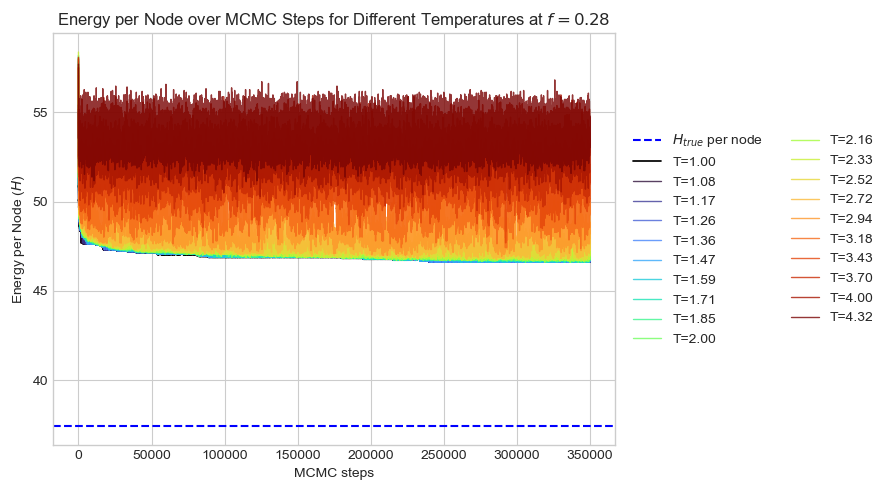

In [102]:
steps = len(energies[0])
        
# Plot energies.
plt.figure(figsize=(11,5))
plt.title(f"Energy per Node over MCMC Steps for Different Temperatures at $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("Energy per Node ($H$)")

# Plot the true energy as a reference.
plt.axhline(y=H_true, color='blue', linestyle='--', label="$H_{true}$ per node")

colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors

# Or, if you want to ensure T=1.0 is black and use a colormap for others:
num_other_replicas = n_replicas - 1 if 1.0 in T else n_replicas
if num_other_replicas > 0:
    other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'
else:
    other_colors = None # Handle case where only T=1.0 exists

color_idx = 0
for j in range(n_replicas):
    label_text = f'T={T[j]:.2f}' # Format temperature to 2 decimal places for consistency

    if T[j] == 1.0:
        plt.plot(range(steps), energies[j], color='black', label=label_text, linewidth=1.25) # Make T=1 distinct
    else:
        if other_colors:
            # Use a color from the 'other_colors' map
            current_color = other_colors(color_idx / (num_other_replicas -1 if num_other_replicas > 1 else 1) )
            plt.plot(range(steps), energies[j], color=current_color, label=label_text, alpha=0.8, linewidth=1.0)
            color_idx += 1
        else: # Should not happen if T[j] != 1.0 and num_other_replicas is 0, but as a fallback
            plt.plot(range(steps), energies[j], label=label_text, alpha=0.8, linewidth=1.0)


# Adjust legend:
# If too many lines, consider placing legend outside the plot or reducing font size further.
# Or, as suggested before, faceting might be a better long-term solution.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1 if n_replicas < 15 else 2)

image_path = "plot" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.tight_layout(rect=[0, 0, 0.82, 1]) # Adjust layout to make space for legend if it's outside
plt.savefig(image_path, bbox_inches='tight')  # Save as a PNG file, bbox_inches='tight' helps fit legend

# Section $3.2.2$: Plot Energy $f=0.46$

In [105]:
file_path = "results_0.46_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "MCMC Steps":
            mcmc_total_steps = int(row[1])
        
        elif row[0] == "Replicas":
            n_replicas = int(row[1])
            
        elif row[0] == "H_min and H_true":
            H_min,H_true = float(row[1]),float(row[2])
            
        elif row[0].startswith("Replica"):
            T.append(float(row[1]))
            energies.append([float(H) for H in row[2:]])

C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors
C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\1431648157.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'


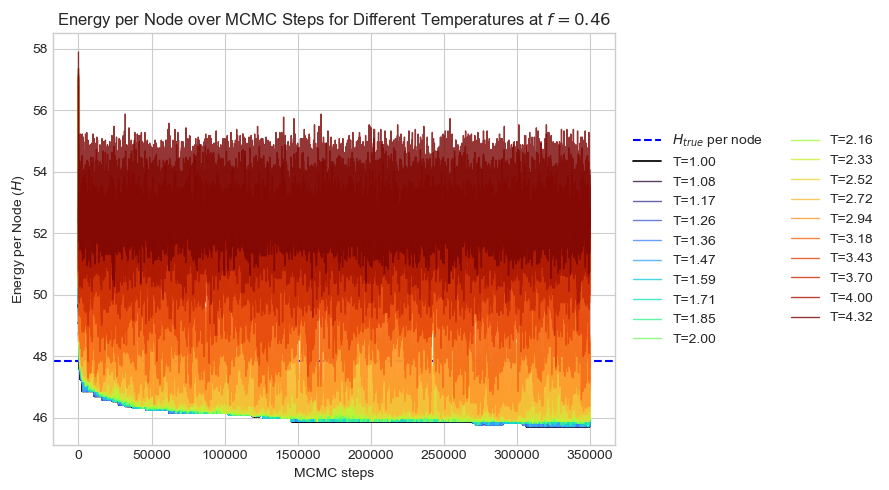

In [106]:
steps = len(energies[0])
        
# Plot energies.
plt.figure(figsize=(11,5))
plt.title(f"Energy per Node over MCMC Steps for Different Temperatures at $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("Energy per Node ($H$)")

# Plot the true energy as a reference.
plt.axhline(y=H_true, color='blue', linestyle='--', label="$H_{true}$ per node")

colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors

# Or, if you want to ensure T=1.0 is black and use a colormap for others:
num_other_replicas = n_replicas - 1 if 1.0 in T else n_replicas
if num_other_replicas > 0:
    other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'
else:
    other_colors = None # Handle case where only T=1.0 exists

color_idx = 0
for j in range(n_replicas):
    label_text = f'T={T[j]:.2f}' # Format temperature to 2 decimal places for consistency

    if T[j] == 1.0:
        plt.plot(range(steps), energies[j], color='black', label=label_text, linewidth=1.25) # Make T=1 distinct
    else:
        if other_colors:
            # Use a color from the 'other_colors' map
            current_color = other_colors(color_idx / (num_other_replicas -1 if num_other_replicas > 1 else 1) )
            plt.plot(range(steps), energies[j], color=current_color, label=label_text, alpha=0.8, linewidth=1.0)
            color_idx += 1
        else: # Should not happen if T[j] != 1.0 and num_other_replicas is 0, but as a fallback
            plt.plot(range(steps), energies[j], label=label_text, alpha=0.8, linewidth=1.0)


# Adjust legend:
# If too many lines, consider placing legend outside the plot or reducing font size further.
# Or, as suggested before, faceting might be a better long-term solution.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1 if n_replicas < 15 else 2)

image_path = "plot" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.tight_layout(rect=[0, 0, 0.82, 1]) # Adjust layout to make space for legend if it's outside
plt.savefig(image_path, bbox_inches='tight')  # Save as a PNG file, bbox_inches='tight' helps fit legend

# Section $3.2.3$: Empirical Transition Point $f_{crit}$

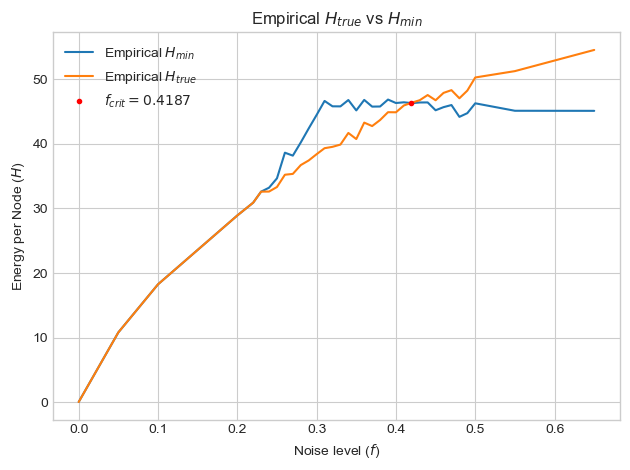

In [107]:
folder = 'bigtest'

# Data structure: {sigma: {run: H_min}}
H_mins = {}
H_trues = {}

# Process all .csv files
for filename in os.listdir(folder):
    if filename.endswith('.csv') and filename.startswith('results_'):
        # Extract sigma and run from filename
        parts = filename.replace('.csv', '').split('_')
        sigma = float(parts[1])
        run = int(parts[2])
        
        # Build full path
        filepath = os.path.join(folder, filename)
        
        # Read the CSV manually (row by row)
        with open(filepath, 'r') as f:
            for line in f:
                row = line.strip().split(',')
                if row[0] == "H_min and H_true":
                    H_min = float(row[1])
                    H_true = float(row[2])
                    break

        # Store H_mins
        if sigma not in H_mins:
            H_mins[sigma] = {}
        H_mins[sigma][run] = H_min

        # Store H_trues
        if sigma not in H_trues:
            H_trues[sigma] = {}
        H_trues[sigma][run] = H_true

sigmas = sorted(H_mins.keys())
avg_Hmins = [np.mean(list(H_mins[sigma].values())) for sigma in sigmas]
avg_Htrues = [np.mean(list(H_trues[sigma].values())) for sigma in sigmas]

# Plot
plt.plot(sigmas, avg_Hmins, label='Empirical $H_{min}$')
plt.plot(sigmas, avg_Htrues, label='Empirical $H_{true}$')

# Find intersection
F_crit_est = None
Y_value_est = None

for i in range(len(sigmas) - 1):
    f0, f1 = sigmas[i], sigmas[i + 1]
    hmin0, hmin1 = avg_Hmins[i], avg_Hmins[i + 1]
    htrue0, htrue1 = avg_Htrues[i], avg_Htrues[i + 1]
    
    # Compute difference at endpoints
    diff0 = hmin0 - htrue0
    diff1 = hmin1 - htrue1

    # Check for sign change => crossing point
    if diff0 * diff1 < 0:
        # Linear interpolation: diff(f) = diff0 + slope * (f - f0)
        slope = (diff1 - diff0) / (f1 - f0)
        F_crit_est = f0 - diff0 / slope  # f at diff = 0

        # Get Y value (e.g., use Hmin at that point)
        slope_hmin = (hmin1 - hmin0) / (f1 - f0)
        Y_value_est = hmin0 + slope_hmin * (F_crit_est - f0)
        break

plt.plot(F_crit_est, Y_value_est, '.', markersize=6, color='red', label=f"$f_{{crit}} = {F_crit_est:.4f}$")


plt.xlabel("Noise level ($f$)")
plt.ylabel("Energy per Node ($H$)")
plt.title("Empirical $H_{true}$ vs $H_{min}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("EmpTransPoint.png", dpi=300)
plt.show()

# Section $3.2.4$ and $3.2.5$: Transition Points

C:\Users\sarro\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\sarro\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\sarro\anaconda3\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\sarro\anaconda3\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
C:\Users\sarro\anaconda3\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


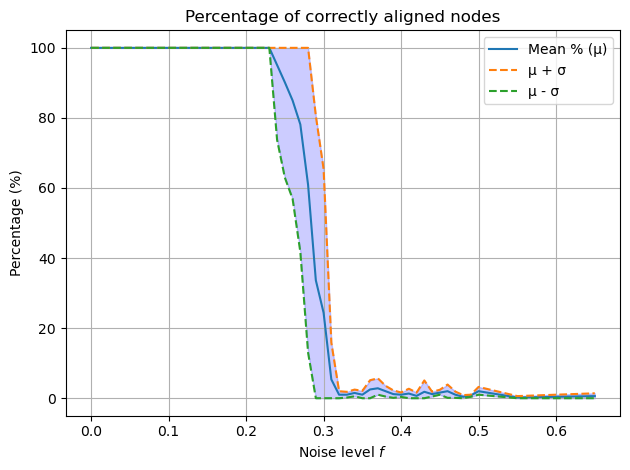

In [35]:
functions.detectability_plot('bigtest',density=False,detectability=True,avg_steps=False,var_steps=False,avg_H_gaps=False,var_H_gaps=False)

### To add the alignability curve, just go to functions.ipynb and uncomment the alignability code line.

# Section $3.3.1$: Plot $H_{\text{true}}$ vs Empirical Data

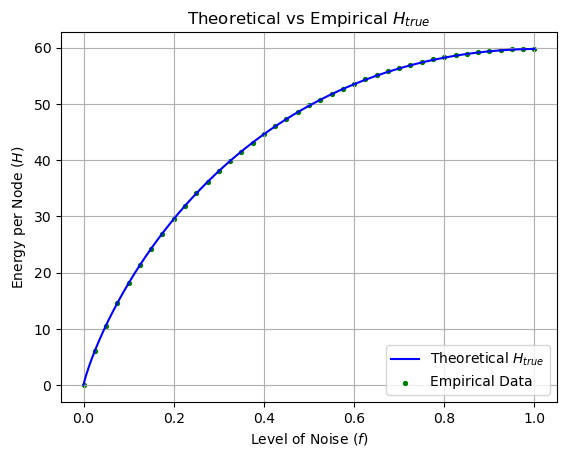

In [18]:
N = 100
p_edge = 0.1
E = N * (N-1) * p_edge
non_E = N * (N-1) * (1-p_edge)
K = 2

alpha_p = 0.2
beta_p = 10
alpha_q = 0.5
beta_q = 5

O_00 = lambda f: 17820
O_10 = lambda f: 0
O_11 = lambda f: 1980 * ((1-f)**2 + 2*(f**2*(1-f))/(9+f) + (f**2)/(9+f**2))
O_01 = lambda f: 1980 - O_11(f)

Kn_1 = lambda f: O_10(f) + O_11(f)
Kn_0 = lambda f: O_00(f) + O_01(f)

def H_true(f):
    f = np.clip(f, 0, 1)
    return (gammaln(Kn_1(f) + alpha_q + beta_q) +
            gammaln(Kn_0(f) + alpha_p + beta_p) -
            gammaln(O_11(f) + beta_q) -
            gammaln(O_10(f) + alpha_q) -
            gammaln(O_00(f) + beta_p) -
            gammaln(O_01(f) + alpha_p)) / N



# Plot H_true
f_vals = np.linspace(0, 1, 500)
plt.figure()
plt.plot(f_vals, [H_true(f) for f in f_vals], color='b', label='Theoretical $H_{true}$')

# Plot empirical data
H_data = np.array([
    [0.0, 0.036578521], [0.025, 6.005793092533334], [0.05, 10.5786839216],
    [0.075, 14.538766796], [0.1, 18.071562154033], [0.125, 21.29835745396667],
    [0.15, 24.234580931966665], [0.175, 26.951309916066666], [0.2, 29.5151972654],
    [0.225, 31.8557909611], [0.25, 34.075396356166664], [0.275, 36.0905531786],
    [0.3, 38.055016080866665], [0.325, 39.827386684733334], [0.35, 41.529770508633334],
    [0.375, 43.1364612376], [0.4, 44.67096165793333], [0.425, 46.06928337236667],
    [0.45, 47.34394438313333], [0.475, 48.598411012], [0.5, 49.7215276179],
    [0.525, 50.760471193266675], [0.55, 51.77584329646667], [0.575, 52.714196907533335],
    [0.6, 53.52870264916667], [0.625, 54.35376887056666], [0.65, 55.1335554893],
    [0.675, 55.76404547773333], [0.7, 56.416992698499996], [0.725, 56.99115260803333],
    [0.75, 57.426077173733326], [0.775, 57.91829675923333], [0.8, 58.32395499626667],
    [0.825, 58.63438039183333], [0.85, 58.93208914346667], [0.875, 59.21177358006667],
    [0.9, 59.39952380436666], [0.925, 59.54949879026666], [0.95, 59.68111566626667],
    [0.975, 59.77507772093333], [1.0, 59.74241129086667]
])

plt.scatter(H_data[:, 0], H_data[:, 1], s=8, color='green', label='Empirical Data')
plt.grid(True)
plt.title('Theoretical vs Empirical $H_{true}$')
plt.xlabel('Level of Noise ($f$)')
plt.ylabel('Energy per Node ($H$)')
plt.legend(loc='lower right')
plt.savefig("HtrueVsEmpData.png", dpi=300)
plt.show()

# Section $3.3.2.1$: Gaussian Approximation

Progress ---> 5.0 %
Progress ---> 10.0 %
Progress ---> 15.0 %
Progress ---> 20.0 %
Progress ---> 25.0 %
Progress ---> 30.0 %
Progress ---> 35.0 %
Progress ---> 40.0 %
Progress ---> 45.0 %
Progress ---> 50.0 %
Progress ---> 55.0 %
Progress ---> 60.0 %
Progress ---> 65.0 %
Progress ---> 70.0 %
Progress ---> 75.0 %
Progress ---> 80.0 %
Progress ---> 85.0 %
Progress ---> 90.0 %
Progress ---> 95.0 %


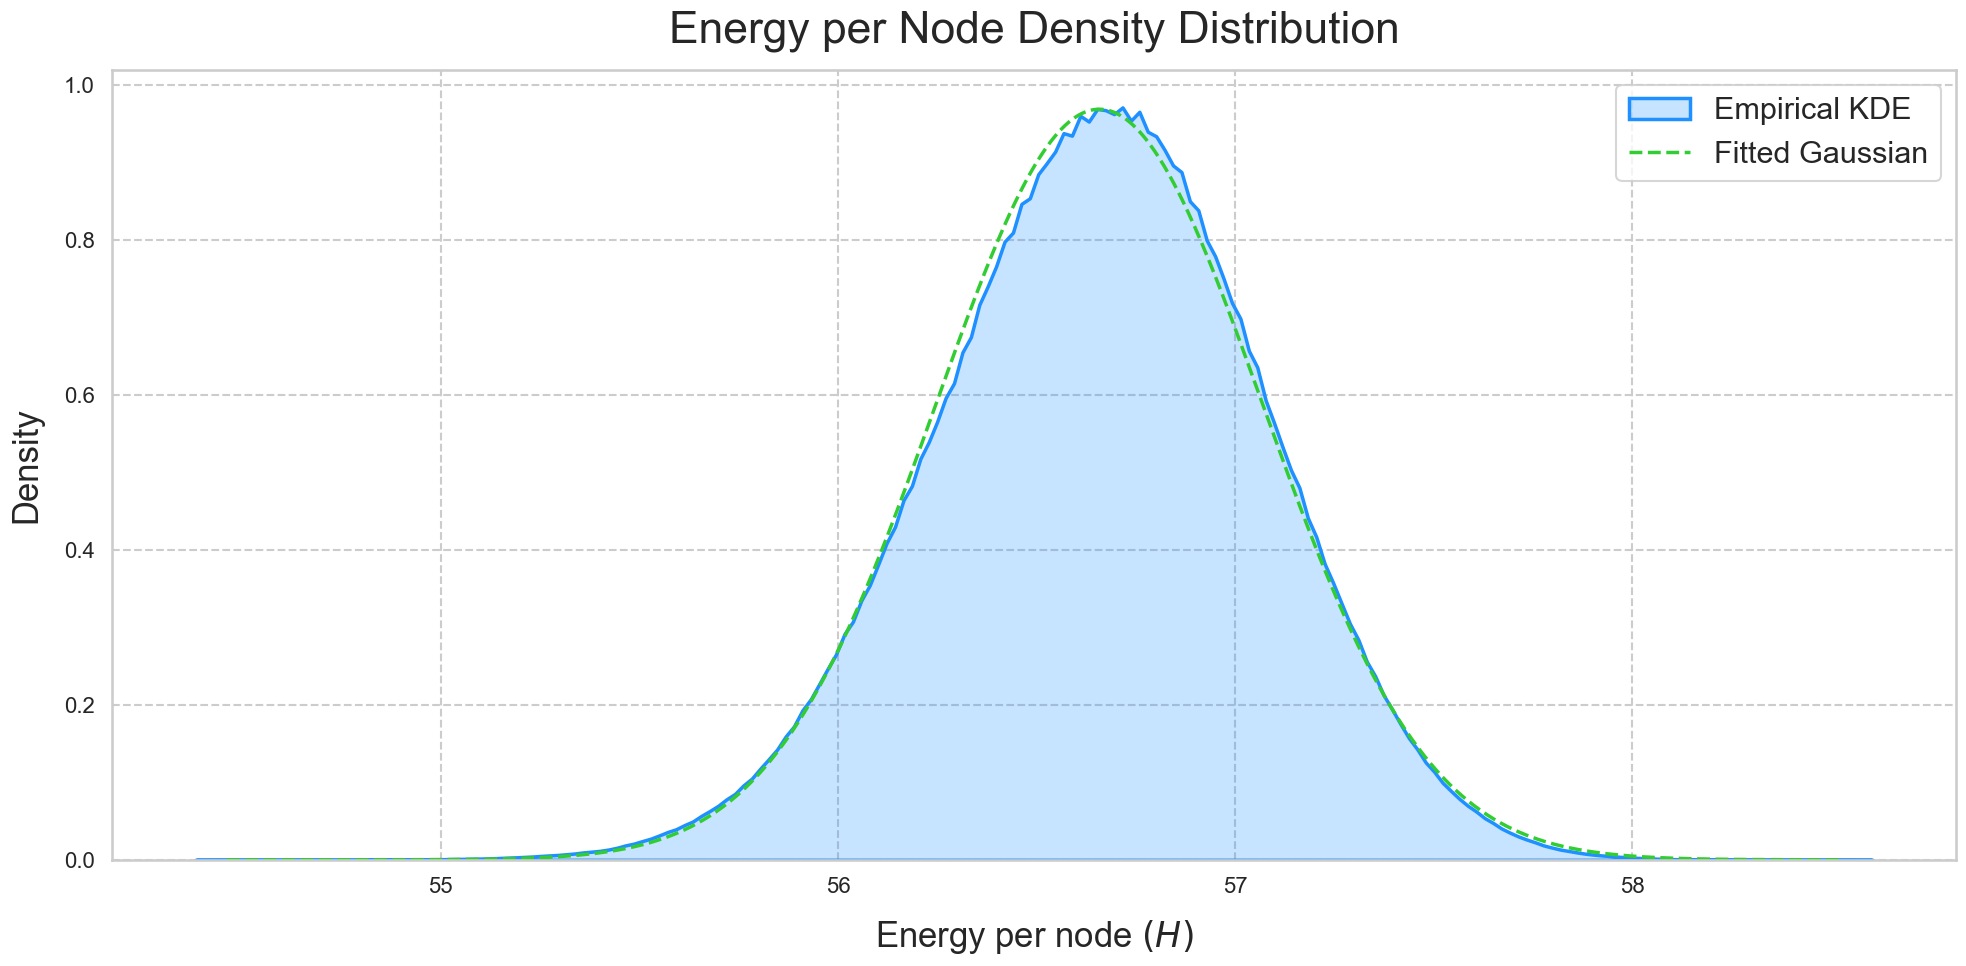

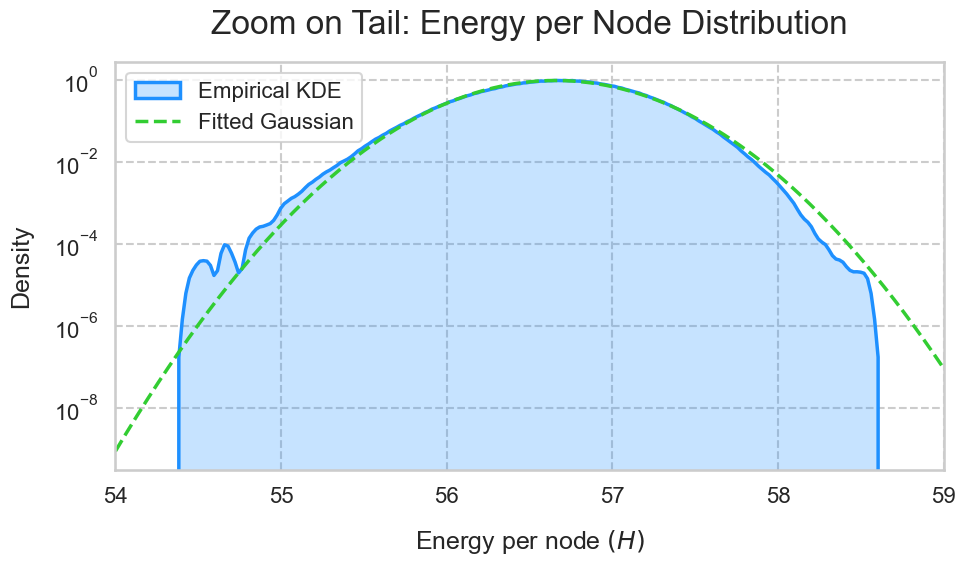

100%


<Figure size 640x480 with 0 Axes>

(56.65805821926476,
 0.4116591958442291,
 56.65805821926476,
 0.4116591958442291,
 54.4609213616309,
 58.526594905355594,
 41.50126059641567)

In [86]:
functions.energies_hist(n_graphs=1, sigma=0.4, max_mcmc_steps=1000000, verbose=True)

# Section $3.3.2.3$: Find $H_{\text{min}}$ and Theoretical Transition Point $f_{crit}$

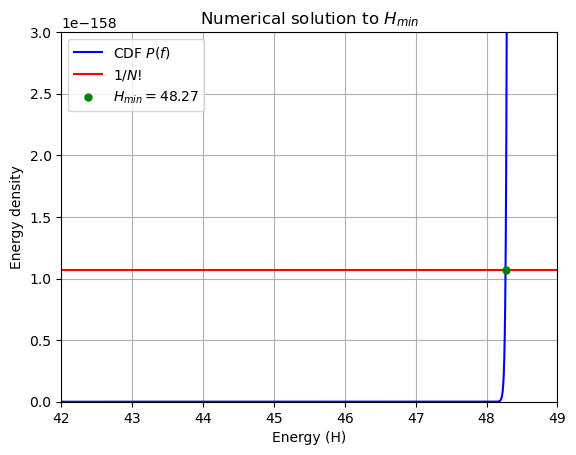

In [5]:
from scipy.special import gammaln, factorial
from scipy.stats import norm
from scipy.optimize import fsolve

# Parameters
N = 100
mu = 59.7748464
sigma = 0.429113555
cdf_gaussian = lambda x: norm.cdf(x, loc=mu, scale=sigma)
y = lambda x: 1.0 / factorial(N)

# Plot CDF and horizontal line
plt.figure()
x_vals = np.linspace(42, 49, 1000)
plt.plot(x_vals, cdf_gaussian(x_vals), 'b', label='CDF $P(f)$')
plt.plot(x_vals, np.full_like(x_vals, y(0)), 'r', label='$1/N!$')
plt.grid(True)
plt.axis([42, 49, 0, 3e-158])

# Find intersection
intersection = fsolve(lambda x: cdf_gaussian(x) - y(x), x0=48.6)[0]
H_minimum = intersection
Y_value = y(intersection)
plt.plot(H_minimum, Y_value, '.', markersize=10, color='green', label=f'$H_{{min}} = {round(H_minimum,2)}$')
plt.title('Numerical solution to $H_{min}$')
plt.xlabel('Energy (H)')
plt.ylabel('Energy density')
plt.legend(loc='best')
plt.savefig("Hmin.png", dpi=300)
plt.show()

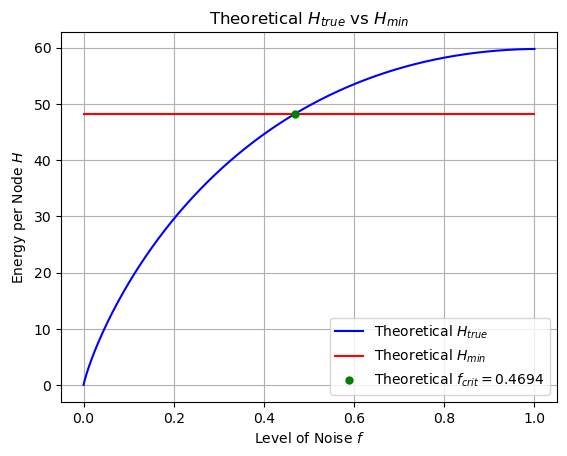

In [6]:
p_edge = 0.1
E = N * (N-1) * p_edge
non_E = N * (N-1) * (1-p_edge)
K = 2

alpha_p = 0.2
beta_p = 10
alpha_q = 0.5
beta_q = 5

O_00 = lambda f: 17820
O_10 = lambda f: 0
O_11 = lambda f: 1980 * ((1-f)**2 + 2*(f**2*(1-f))/(9+f) + (f**2)/(9+f**2))
O_01 = lambda f: 1980 - O_11(f)

Kn_1 = lambda f: O_10(f) + O_11(f)
Kn_0 = lambda f: O_00(f) + O_01(f)

def H_true(f):
    f = np.clip(f, 0, 1)
    return (gammaln(Kn_1(f) + alpha_q + beta_q) +
            gammaln(Kn_0(f) + alpha_p + beta_p) -
            gammaln(O_11(f) + beta_q) -
            gammaln(O_10(f) + alpha_q) -
            gammaln(O_00(f) + beta_p) -
            gammaln(O_01(f) + alpha_p)) / N

H_min = lambda f: H_minimum

# Plot H_true and H_min
f_vals = np.linspace(0, 1, 500)
plt.plot(f_vals, [H_true(f) for f in f_vals], 'b', label='Theoretical $H_{true}$')
plt.plot(f_vals, [H_min(f) for f in f_vals], 'r', label='Theoretical $H_{min}$')
plt.grid(True)

# Find critical f
F_crit = fsolve(lambda f: H_true(f) - H_min(f), x0=0.5)[0]
Y_value = H_min(F_crit)
plt.plot(F_crit, Y_value, '.', color='green', markersize=10, label=f'Theoretical $f_{{crit}} = {round(F_crit,4)}$')

# Empirical data
plt.title('Theoretical $H_{true}$ vs $H_{min}$')
plt.xlabel('Level of Noise $f$')
plt.ylabel('Energy per Node $H$')
plt.legend(loc='lower right')
plt.savefig("TheorHtrueVsHmin.png", dpi=300)
plt.show()

# Section $3.3.3$: Difference between Theoretical and Empirical $H_{min}$ (and between $f_{\text{crit}}$)

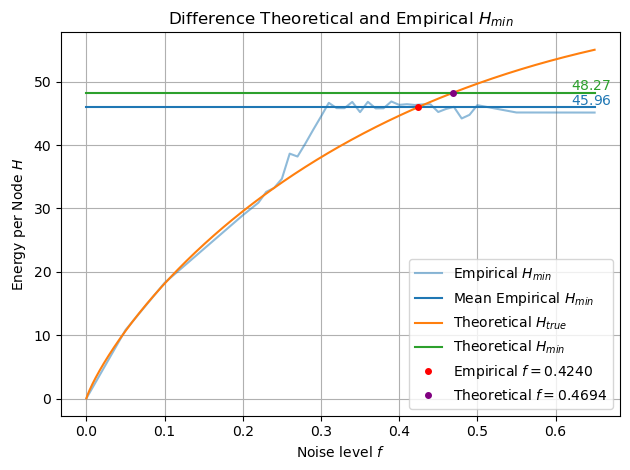

In [37]:
from scipy.special import gammaln

folder = 'bigtest'

# Data structure: {sigma: {run: H_min}}
H_mins = {}
empHmins = []

# Process all .csv files
for filename in os.listdir(folder):
    if filename.endswith('.csv') and filename.startswith('results_'):
        # Extract sigma and run from filename
        parts = filename.replace('.csv', '').split('_')
        f = float(parts[1])
        run = int(parts[2])
        
        # Build full path
        filepath = os.path.join(folder, filename)
        
        # Read the CSV manually (row by row)
        with open(filepath, 'r') as file:
            for line in file:
                row = line.strip().split(',')
                if row[0] == "H_min and H_true":
                    H_min = float(row[1])
                    if f > 0.3:
                        empHmins.append(H_min)
                    break

        # Store in dict
        if f not in H_mins:
            H_mins[f] = {}
        H_mins[f][run] = H_min


# Noise levels
noise_levels = sorted(H_mins.keys())

# Theoretical H_min
th_Hmin = lambda f: 48.27

# Empirical H_min
emp_Hmins = [np.mean(list(H_mins[f].values())) for f in noise_levels]

# Mean empirical H_min
mean_Hmin = np.mean(empHmins)
mean_emp_Hmin = lambda f: mean_Hmin

# Theoretical H_true
N, alpha_p, beta_p, alpha_q, beta_q = 100, 0.2, 10, 0.5, 5

O_00 = lambda f: 17820
O_10 = lambda f: 0
O_11 = lambda f: 1980 * ((1-f)**2 + 2*(f**2*(1-f))/(9+f) + (f**2)/(9+f**2))
O_01 = lambda f: 1980 - O_11(f)

Kn_1 = lambda f: O_10(f) + O_11(f)
Kn_0 = lambda f: O_00(f) + O_01(f)

def H_true(f):
    f = np.clip(f, 0, 1)
    return (gammaln(Kn_1(f) + alpha_q + beta_q) +
            gammaln(Kn_0(f) + alpha_p + beta_p) -
            gammaln(O_11(f) + beta_q) -
            gammaln(O_10(f) + alpha_q) -
            gammaln(O_00(f) + beta_p) -
            gammaln(O_01(f) + alpha_p)) / N
    

#plt.plot(f_vals, [H_min(f) for f in f_vals]
# Plot
extended_f_values = np.linspace(min(noise_levels), max(noise_levels), 500)
plt.plot(noise_levels, emp_Hmins, alpha=0.5, label='Empirical $H_{min}$')
plt.plot(noise_levels, [mean_emp_Hmin(f) for f in noise_levels], color='C0', label='Mean Empirical $H_{min}$')
plt.plot(extended_f_values, H_true(extended_f_values), label='Theoretical $H_{true}$')
plt.plot(noise_levels, [th_Hmin(f) for f in noise_levels], label='Theoretical $H_{min}$')

plt.text(0.62, 48.27 + 0.35, '$48.27$', color='tab:green')
plt.text(0.62, mean_Hmin + 0.35, f'${np.mean(empHmins):.2f}$', color='C0')

# Plot empirical solution (with new approximation)
emp_f_crit = fsolve(lambda f: H_true(f) - mean_emp_Hmin(f), x0=0.5)[0]
emp_Y_value = H_true(emp_f_crit)
plt.plot(emp_f_crit, emp_Y_value, '.', markersize=8, color='red', label=f"Empirical $f = {emp_f_crit:.4f}$")

# Plot theoretical solution (kind of bad)
th_f_crit = fsolve(lambda f: H_true(f) - th_Hmin(f), x0=0.5)[0]
th_Y_value = H_true(th_f_crit)
plt.plot(th_f_crit, th_Y_value, '.', markersize=8, color='purple', label=f"Theoretical $f = {th_f_crit:.4f}$")


plt.xlabel("Noise level $f$")
plt.ylabel("Energy per Node $H$")
plt.title("Difference Theoretical and Empirical $H_{min}$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("DiffThEmpHmin.png", dpi=300)
plt.show()

# Section $3.3.4$: Expected Number of MCMC Steps Until Success

## Read experiment results

In [3]:
# Directory containing the files
folder = 'bigtest'

# Data structure: {sigma: {run: value}}
data = {}

# Process all .csv files
for filename in os.listdir(folder):
    if filename.endswith('.csv') and filename.startswith('results_'):
        # Extract sigma and run from filename
        parts = filename.replace('.csv', '').split('_')
        sigma = float(parts[1])
        run = int(parts[2])
        
        # Build full path
        filepath = os.path.join(folder, filename)
        
        # Read the CSV manually (row by row)
        with open(filepath, 'r') as f:
            for line in f:
                row = line.strip().split(',')
                if row[0].startswith('Steps required'):
                    value = int(row[1].strip())
                    break

            else:
                value = np.nan  # Not found

        # Store in dict
        if sigma not in data:
            data[sigma] = {}
        data[sigma][run] = value

# Convert to DataFrame
df = pd.DataFrame.from_dict(data, orient='index').sort_index()
df = df.sort_index(axis=1)  # sort runs (columns)

# Show or save the result
df
# df.to_csv("steps_table.csv")

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.05,780.0,476.0,1353.0,219.0,991.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.10,718.0,5082.0,3521.0,5928.0,3971.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.20,3332.0,14195.0,14329.0,31091.0,96280.0,13149.0,20812.0,19413.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.22,64394.0,97579.0,5095.0,77530.0,59884.0,78111.0,148494.0,11268.0,78172.0,86876.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.23,36573.0,30526.0,NaN,17884.0,158305.0,168597.0,116710.0,106385.0,70475.0,153647.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.24,142351.0,21155.0,153240.0,199526.0,57538.0,187380.0,190455.0,-1.0,80936.0,47919.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.25,173729.0,NaN,232683.0,26614.0,-1.0,85274.0,70262.0,235122.0,89274.0,110175.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.26,321754.0,NaN,40566.0,NaN,NaN,NaN,NaN,NaN,26060.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0.27,NaN,150764.0,124590.0,151000.0,-1.0,NaN,-1.0,128056.0,202438.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot the Expected MCMC Steps per Noise Level

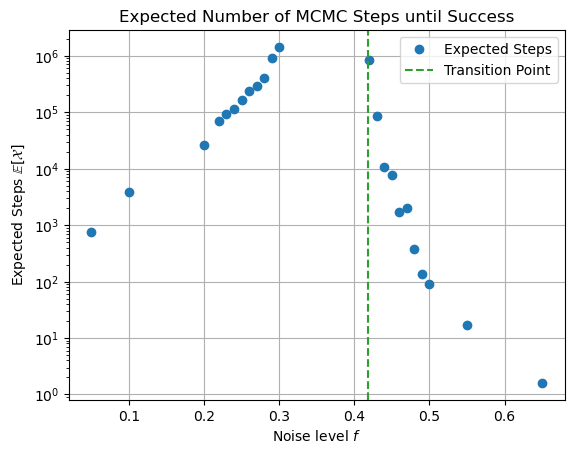

In [4]:
# Function to find the success probability (per sigma).
def get_rho(values, Mmax=350000):
    Mtot, Nsuccess = 0, 0
    for v in values:
        if v < 0:
            Mtot += Mmax
        elif not np.isnan(v):
            Nsuccess += 1
            Mtot += v
    return Nsuccess / Mtot

# Find them for the data in the experiments.
noise_levels, rhos, ts = [], [], []
for f, row in df.iterrows():
    if f > 0.01:
        rho = get_rho(list(row))
        if rho > 0:
            noise_levels.append(f)
            rhos.append(rho)
            ts.append(1 / rho)

# Plot the results.
plt.plot(noise_levels, ts, 'o', label='Expected Steps')
plt.axvline(0.4187, ymax=10e8, ls='--', color='C2', label='Transition Point')

plt.title("Expected Number of MCMC Steps until Success")
plt.yscale('log')
plt.xlabel('Noise level $f$')
plt.ylabel('Expected Steps $\mathbb{E}[\mathcal{X}]$')
plt.grid(True)
plt.legend(loc='best')
plt.savefig("ExpNumbSteps.png", dpi=300, bbox_inches='tight')
plt.show()

# Power Law Fit

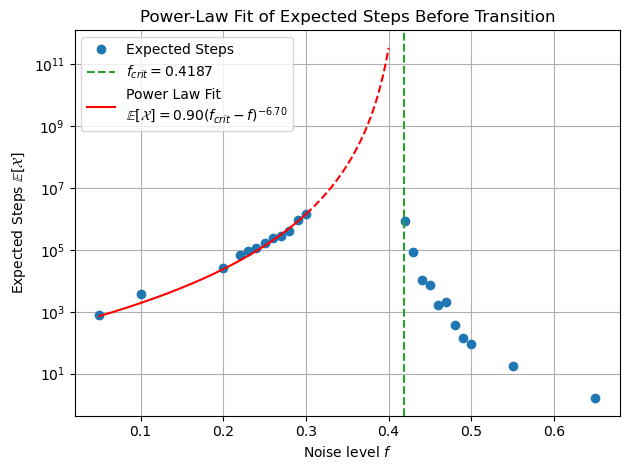

In [73]:
from scipy.optimize import curve_fit

# Critical noise value and conversion to efficient data type.
f_crit = 0.4187
f_vals = np.array(noise_levels)
t_vals = np.array(ts)

# Plot expected steps and transition point.
plt.plot(f_vals, t_vals, 'o', label='Expected Steps')
plt.axvline(f_crit, ls='--', color='C2', label=f'$f_{{crit}} = {f_crit}$')

# Fit a power law, and plot it.

# 1. Filter the data to the left of f_crit
mask = f_vals < f_crit
f_fit = f_vals[mask]
t_fit = t_vals[mask]

# 2. Define the power law function
def power_law(f, A, gamma):
    return A * (f_crit - f) ** (-gamma)

# 3. Fit the data
popt, pcov = curve_fit(power_law, f_fit, t_fit, p0=[1, 6])
A_fit, gamma_fit = popt

# 4. Plot original data and fit
f_range = np.linspace(min(f_fit), max(f_fit), 300)
t_pred = power_law(f_range, A_fit, gamma_fit)
plt.plot(f_range, t_pred, '-', color='red', label=f'Power Law Fit\n$\\mathbb{{E}}[\\mathcal{{X}}] = {A_fit:.2f}(f_{{crit}} - f)^{{-{gamma_fit:.2f}}}$')

# 5. Extend fit to visualise convergence
f_extrap = np.linspace(0.3, 0.4, 300)
t_extrap = power_law(f_extrap, A_fit, gamma_fit)
plt.plot(f_extrap, t_extrap, '--', color='red')

# Additional Info
plt.yscale('log')
plt.xlabel('Noise level $f$')
plt.ylabel('Expected Steps $\mathbb{E}[\mathcal{X}]$')
plt.title('Power-Law Fit of Expected Steps Before Transition')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("PowerLawFit.png", dpi=300)
plt.show()

# Section $3.3.5$: Energy-Structure Decoupling with Perturbed Alignment

In [33]:
file_path = "results_0.35_60.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            sigma = float(row[1])
            
        elif row[0] == "MCMC Steps":
            mcmc_total_steps = int(row[1])
        
        elif row[0] == "Replicas":
            n_replicas = int(row[1])
            
        elif row[0] == "H_min and H_true":
            H_min,H_true = float(row[1]),float(row[2])
            
        elif row[0].startswith("Replica"):
            T.append(float(row[1]))
            energies.append([float(H) for H in row[2:]])

C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\2403593623.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors
C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\2403593623.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'


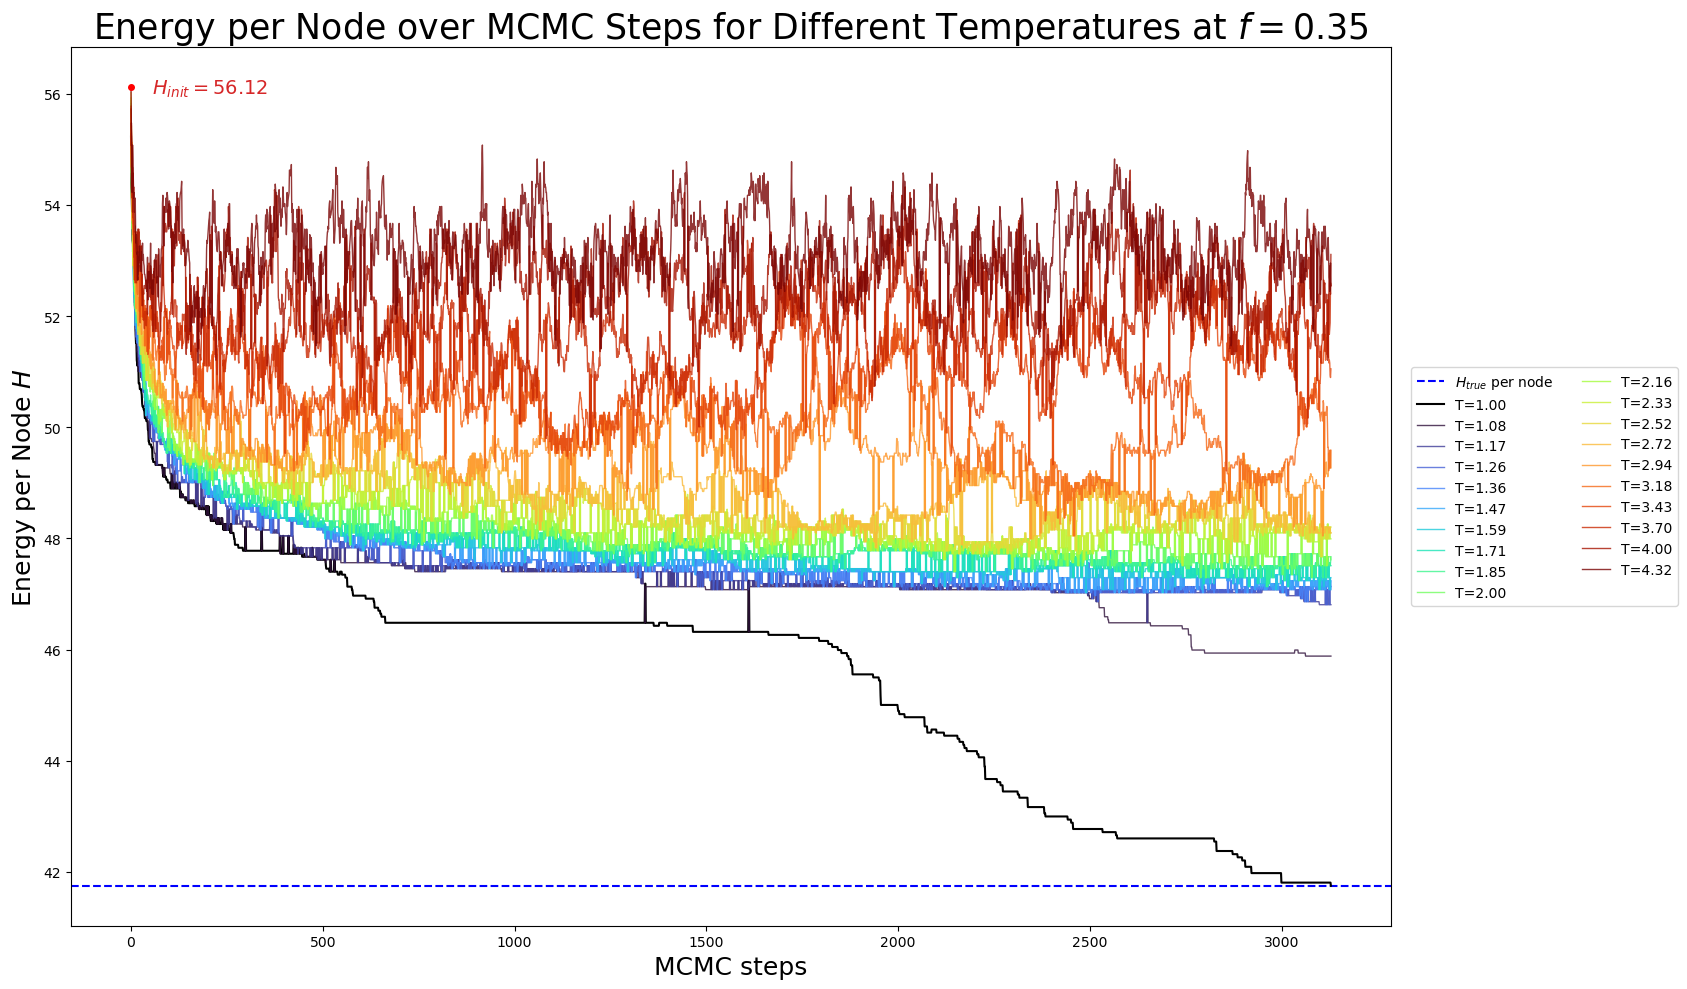

In [34]:
steps = len(energies[0])
        
# Plot energies.
plt.figure(figsize=(20,10))
plt.title(f"Energy per Node over MCMC Steps for Different Temperatures at $f={sigma}$",fontsize=25)
plt.xlabel("MCMC steps",fontsize=18)
plt.ylabel("Energy per Node $H$",fontsize=18)

# Plot the true energy as a reference.
plt.axhline(y=H_true, color='blue', linestyle='--', label="$H_{true}$ per node")

colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors

# Or, if you want to ensure T=1.0 is black and use a colormap for others:
num_other_replicas = n_replicas - 1 if 1.0 in T else n_replicas
if num_other_replicas > 0:
    other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'
else:
    other_colors = None # Handle case where only T=1.0 exists

color_idx = 0
for j in range(n_replicas):
    label_text = f'T={T[j]:.2f}' # Format temperature to 2 decimal places for consistency

    if T[j] == 1.0:
        plt.plot(range(steps), energies[j], color='black', label=label_text, linewidth=1.5) # Make T=1 distinct
    else:
        if other_colors:
            # Use a color from the 'other_colors' map
            current_color = other_colors(color_idx / (num_other_replicas -1 if num_other_replicas > 1 else 1) )
            plt.plot(range(steps), energies[j], color=current_color, label=label_text, alpha=0.8, linewidth=1.0)
            color_idx += 1
        else: # Should not happen if T[j] != 1.0 and num_other_replicas is 0, but as a fallback
            plt.plot(range(steps), energies[j], label=label_text, alpha=0.8, linewidth=1.0)


plt.plot(0, energies[-1][0], '.', markersize=8, color='red')
plt.text(55, energies[-1][0]-0.13, f'$H_{{init}} = {energies[-1][0]:.2f}$', size=14, color='tab:red')
# Adjust legend:
# If too many lines, consider placing legend outside the plot or reducing font size further.
# Or, as suggested before, faceting might be a better long-term solution.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10, ncol=1 if n_replicas < 15 else 2)

image_path = "plot" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend if it's outside
plt.savefig(image_path, bbox_inches='tight', dpi=300)  # Save as a PNG file, bbox_inches='tight' helps fit legend

In [37]:
file_path = "results_0.25_10.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            sigma = float(row[1])
            
        elif row[0] == "MCMC Steps":
            mcmc_total_steps = int(row[1])
        
        elif row[0] == "Replicas":
            n_replicas = int(row[1])
            
        elif row[0] == "H_min and H_true":
            H_min,H_true = float(row[1]),float(row[2])
            
        elif row[0].startswith("Replica"):
            T.append(float(row[1]))
            energies.append([float(H) for H in row[2:]])

C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\2403593623.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors
C:\Users\sarro\AppData\Local\Temp\ipykernel_34372\2403593623.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'


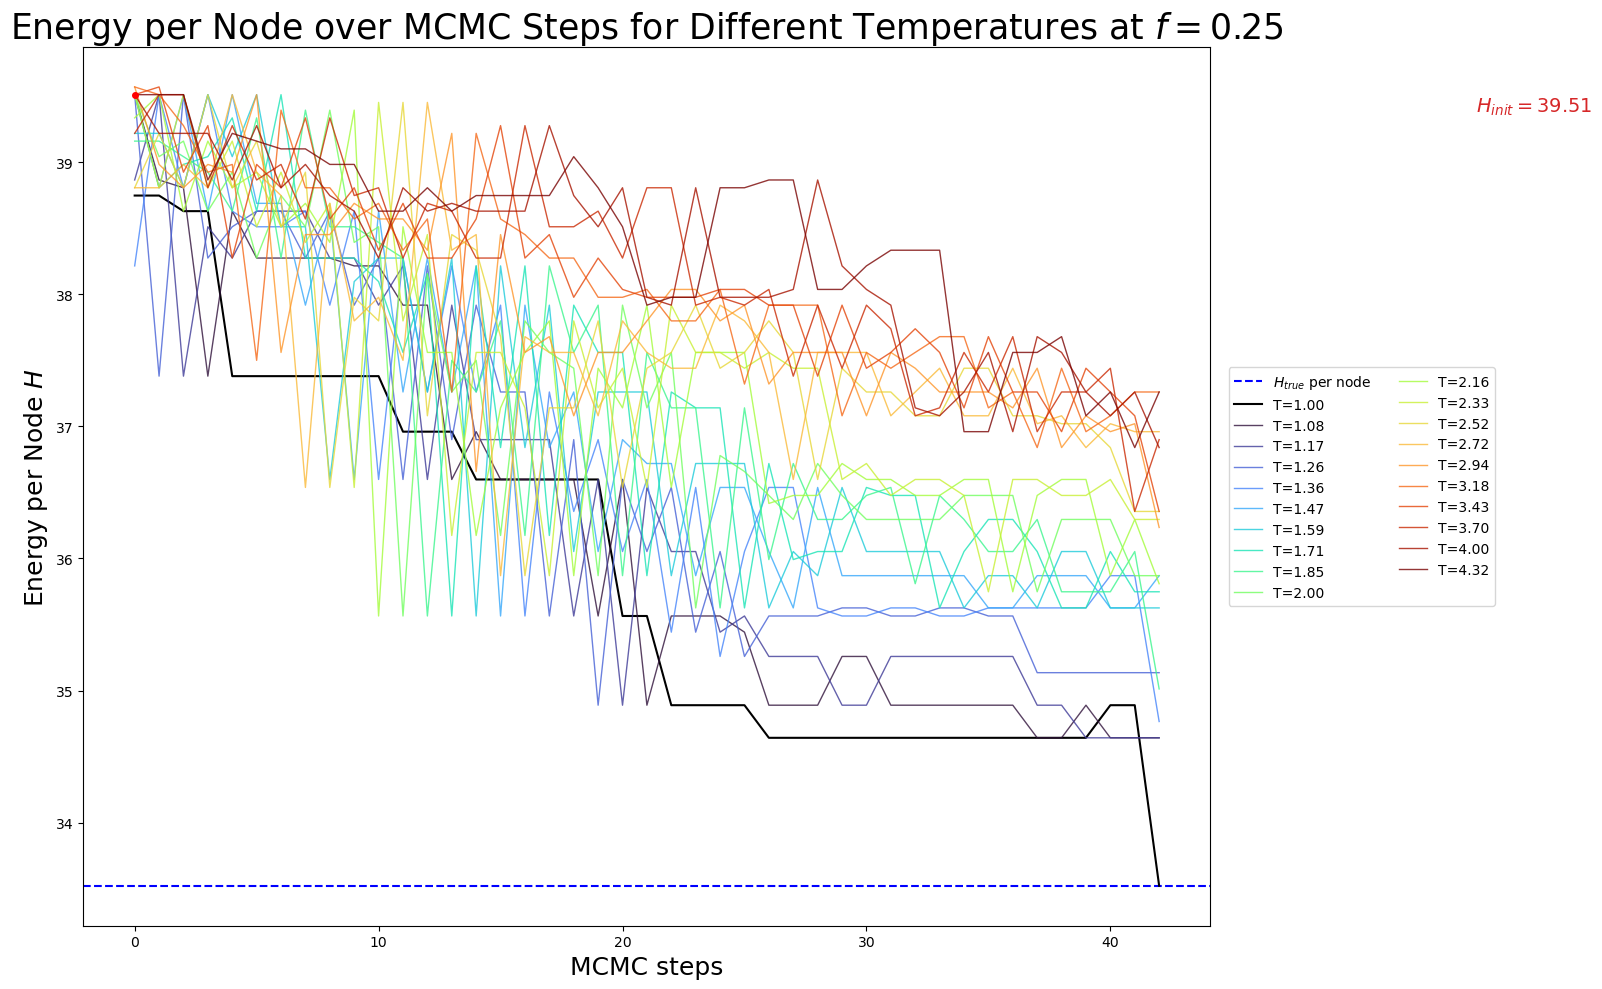

In [38]:
steps = len(energies[0])
        
# Plot energies.
plt.figure(figsize=(20,10))
plt.title(f"Energy per Node over MCMC Steps for Different Temperatures at $f={sigma}$",fontsize=25)
plt.xlabel("MCMC steps",fontsize=18)
plt.ylabel("Energy per Node $H$",fontsize=18)

# Plot the true energy as a reference.
plt.axhline(y=H_true, color='blue', linestyle='--', label="$H_{true}$ per node")

colormap = c.get_cmap('turbo', n_replicas) # Get n_replicas colors

# Or, if you want to ensure T=1.0 is black and use a colormap for others:
num_other_replicas = n_replicas - 1 if 1.0 in T else n_replicas
if num_other_replicas > 0:
    other_colors = c.get_cmap('turbo', num_other_replicas) # e.g., 'viridis', 'plasma'
else:
    other_colors = None # Handle case where only T=1.0 exists

color_idx = 0
for j in range(n_replicas):
    label_text = f'T={T[j]:.2f}' # Format temperature to 2 decimal places for consistency

    if T[j] == 1.0:
        plt.plot(range(steps), energies[j], color='black', label=label_text, linewidth=1.5) # Make T=1 distinct
    else:
        if other_colors:
            # Use a color from the 'other_colors' map
            current_color = other_colors(color_idx / (num_other_replicas -1 if num_other_replicas > 1 else 1) )
            plt.plot(range(steps), energies[j], color=current_color, label=label_text, alpha=0.8, linewidth=1.0)
            color_idx += 1
        else: # Should not happen if T[j] != 1.0 and num_other_replicas is 0, but as a fallback
            plt.plot(range(steps), energies[j], label=label_text, alpha=0.8, linewidth=1.0)


plt.plot(0, energies[-1][0], '.', markersize=8, color='red')
plt.text(55, energies[-1][0]-0.13, f'$H_{{init}} = {energies[-1][0]:.2f}$', size=14, color='tab:red')
# Adjust legend:
# If too many lines, consider placing legend outside the plot or reducing font size further.
# Or, as suggested before, faceting might be a better long-term solution.
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=10, ncol=1 if n_replicas < 15 else 2)

image_path = "plot" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend if it's outside
plt.savefig(image_path, bbox_inches='tight', dpi=300)  # Save as a PNG file, bbox_inches='tight' helps fit legend

# Annex: Alignment Accuracy for $f=0.2$

In [60]:
file_path = "results_0.2_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "Percentages of the best replica per step":
            percents = [float(x) for x in row[1:]]

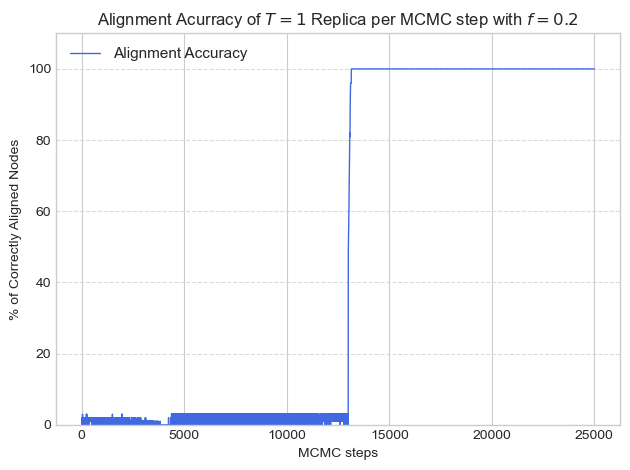

In [74]:
plt.style.use('seaborn-v0_8-whitegrid') # Popular choice, gives a nice grid and look

steps = 25000

plt.title(f"Alignment Acurracy of $T=1$ Replica per MCMC step with $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("% of Correctly Aligned Nodes")

# 3. Plot Raw Data (thinner, lighter, more transparent)
plt.plot(range(steps), percents[:steps], color='royalblue', linewidth=1, label='Alignment Accuracy')

# 4. Adjust Y-axis limits and add horizontal grid
# Ensure y-axis starts at 0 and gives a bit of headroom above the max value
# Handle potential NaNs in percents when finding max
max_val = np.nanmax(percents) if np.any(~np.isnan(percents)) else 7.5 # Default to 7.5 if all NaN
plt.ylim(bottom=-0.1, top=max(max_val * 1.1, 8.0)) # Give a little space below 0 too
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid

# 7. Add Legend
plt.legend(loc='upper left', fontsize=11)

# 8. Ensure tight layout before saving
plt.tight_layout()

image_path = "%_align" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.savefig(image_path, dpi=300)  # Save as a PNG file, added dpi for better quality
plt.show() # Optional: to display the plot in a script/notebook

# Alignment Accuracy for $f=0.38$

In [80]:
file_path = "results_0.38_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "Percentages of the best replica per step":
            percents = [float(x) for x in row[1:]]

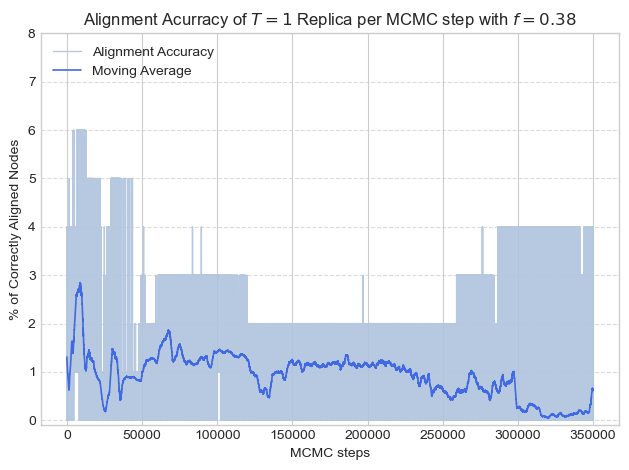

In [81]:
plt.style.use('seaborn-v0_8-whitegrid') # Popular choice, gives a nice grid and look

# 2. Calculate Moving Average
window_size = 2000  # Experiment with this value (e.g., 100, 500, 1000)
# Convert to pandas Series to easily calculate rolling mean, handling potential NaNs
percents_series = pd.Series(percents)
moving_avg = percents_series.rolling(window=window_size, center=True, min_periods=1).mean().to_numpy()

plt.title(f"Alignment Acurracy of $T=1$ Replica per MCMC step with $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("% of Correctly Aligned Nodes")

# 3. Plot Raw Data (thinner, lighter, more transparent)
plt.plot(range(350000), percents, color='lightsteelblue', linewidth=1, alpha=0.9, label='Alignment Accuracy')

# 4. Plot Moving Average (stronger color, thicker line)
plt.plot(range(350000), moving_avg, color='royalblue', linewidth=1.2, label='Moving Average')

# 5. Adjust Y-axis limits and add horizontal grid
# Ensure y-axis starts at 0 and gives a bit of headroom above the max value
# Handle potential NaNs in percents when finding max
max_val = np.nanmax(percents) if np.any(~np.isnan(percents)) else 7.5 # Default to 7.5 if all NaN
plt.ylim(bottom=-0.1, top=max(max_val * 1.1, 8.0)) # Give a little space below 0 too
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid

# 7. Add Legend
plt.legend(loc='upper left') # Adjust loc as needed

# 8. Ensure tight layout before saving
plt.tight_layout()

image_path = "%_align" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.savefig(image_path, dpi=300)  # Save as a PNG file, added dpi for better quality
plt.show() # Optional: to display the plot in a script/notebook

# Plot % of Well-Aligned Nodes

In [83]:
file_path = "results_0.46_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0] == "Percentages of the best replica per step":
            percents = [float(x) for x in row[1:]]

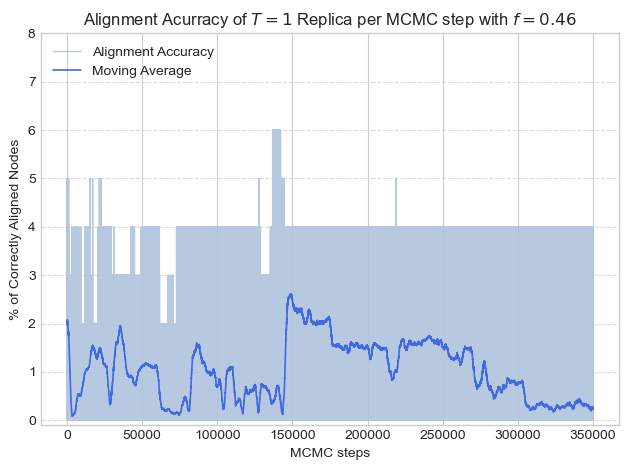

In [85]:
plt.style.use('seaborn-v0_8-whitegrid') # Popular choice, gives a nice grid and look

# 2. Calculate Moving Average
window_size = 2000  # Experiment with this value (e.g., 100, 500, 1000)
# Convert to pandas Series to easily calculate rolling mean, handling potential NaNs
percents_series = pd.Series(percents)
moving_avg = percents_series.rolling(window=window_size, center=True, min_periods=1).mean().to_numpy()

plt.title(f"Alignment Acurracy of $T=1$ Replica per MCMC step with $f={f}$")
plt.xlabel("MCMC steps")
plt.ylabel("% of Correctly Aligned Nodes")

# 3. Plot Raw Data (thinner, lighter, more transparent)
plt.plot(range(350000), percents, color='lightsteelblue', linewidth=1, alpha=0.9, label='Alignment Accuracy')

# 4. Plot Moving Average (stronger color, thicker line)
plt.plot(range(350000), moving_avg, color='royalblue', linewidth=1.2, label='Moving Average')

# 5. Adjust Y-axis limits and add horizontal grid
# Ensure y-axis starts at 0 and gives a bit of headroom above the max value
# Handle potential NaNs in percents when finding max
max_val = np.nanmax(percents) if np.any(~np.isnan(percents)) else 7.5 # Default to 7.5 if all NaN
plt.ylim(bottom=-0.1, top=max(max_val * 1.1, 8.0)) # Give a little space below 0 too
plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a horizontal grid

# 7. Add Legend
plt.legend(loc='upper left') # Adjust loc as needed

# 8. Ensure tight layout before saving
plt.tight_layout()

image_path = "%_align" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.savefig(image_path, dpi=300)  # Save as a PNG file, added dpi for better quality
plt.show() # Optional: to display the plot in a script/notebook

# Additional functions that weren't used.

# Plot of Local Minima

In [53]:
file_path = "results_0.38_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            f = float(row[1])
            
        elif row[0].startswith("Steps required"):
            final_steps = int(row[1])
            
        elif row[0] == "Replica 1":
            T = float(row[1])
            H = [float(h) for h in row[2:]]
            
            lower_H = float(row[2])
            min_H = [lower_H]
            
            for h in row[3:]:
                if float(h) < lower_H:
                    lower_H = float(h)
                min_H.append(lower_H)
    
    
    final_steps = len(H) if final_steps == -1 else final_steps

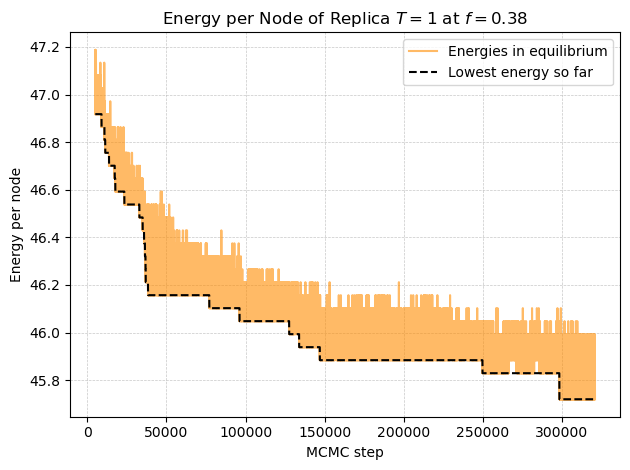

In [54]:
# Plot energies.
plt.plot(range(5000, 11 * final_steps // 12), H[5000:11 * final_steps // 12], 
         color='darkorange', alpha=0.6, label='Energies in equilibrium')
plt.plot(range(5000, 11 * final_steps // 12), min_H[5000:11 * final_steps // 12], 
         color='black', linestyle='--', label='Lowest energy so far')

plt.title(f"Energy per Node of Replica $T=1$ at $f = {f}$")
plt.xlabel("MCMC step")
plt.ylabel("Energy per node")
plt.xticks()
plt.yticks()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='best', frameon=True)
plt.tight_layout()

# Save and show
image_path = "energies_equi" + file_path.split("results")[1].split(".csv")[0] + ".png"
plt.savefig(image_path, dpi=300)
plt.show()

# Plot $O_{XY}$ Values

In [16]:
file_path = "results_0.46_0.csv"
with open(file_path, mode='r', newline='') as file:
    reader = csv.reader(file)
    
    T = []
    energies = []

    # Loop through the rows in the CSV file
    for row in reader:
        if row[0] == "Sigma":
            sigma = float(row[1])

        elif row[0] == "MCMC Steps":
            steps = int(row[1])
            
        elif row[0] == "O_00":
            O_00_vals = [int(x) for x in row[1:]]

        elif row[0] == "O_01":
            O_01_vals = [int(x) for x in row[1:]]

        elif row[0] == "O_10":
            O_10_vals = [int(x) for x in row[1:]]

        elif row[0] == "O_11":
            O_11_vals = [int(x) for x in row[1:]]


f = sigma
O_11_true = 1980 * ((1-f)**2 + 2*(f**2*(1-f))/(9+f) + (f**2)/(9+f**2))
O_01_true = 1980 - O_11_true

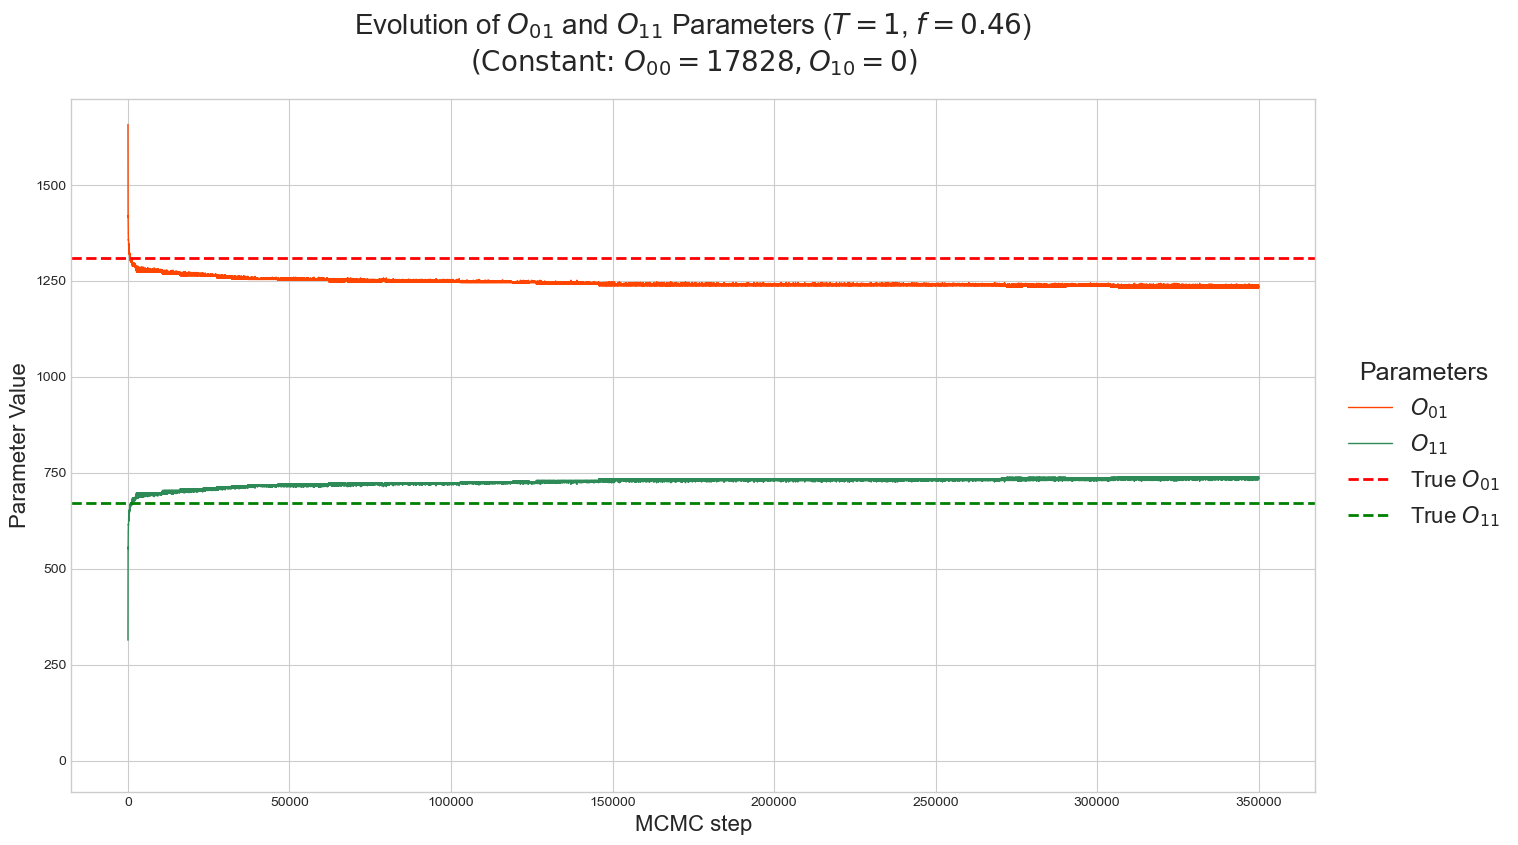

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')

# Create the plot
plt.figure(figsize=(18, 9)) # Adjusted figure size for better aspect ratio

title_line1 = rf"Evolution of $O_{{01}}$ and $O_{{11}}$ Parameters ($T=1$, $f={sigma}$)"
title_line2 = rf"$\text{{(Constant: }} O_{{00}} = {int(O_00_vals[0])}, O_{{10}} = {int(O_10_vals[0])})$" # Enclose non-math in \mathrm{} or \text{}

plt.title(title_line1 + "\n" + title_line2, fontsize=20, pad=20)

plt.xlabel("MCMC step", fontsize=16)
plt.ylabel(r"Parameter Value", fontsize=16) # More general Y-label

# Plot O_01, O_11.
plt.plot(range(steps), O_01_vals, label=r'$O_{01}$', color='orangered', alpha=1, linewidth=1) #color='coral', alpha=0.4
plt.plot(range(steps), O_11_vals, label=r'$O_{11}$', color='seagreen', alpha=1, linewidth=1) #col='mediumaquamarine', alpha=0.4

# Plot O_01 true, O_11 true.
plt.axhline(O_01_true, color='red', linestyle='--', linewidth=2, label=r'True $O_{01}$')
plt.axhline(O_11_true, color='green', linestyle='--', linewidth=2, label=r'True $O_{11}$')

# Customize Legend
plt.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), fontsize=16, title="Parameters", title_fontsize=18)

# Adjust Y-axis (optional, Matplotlib usually does a good job here)
# If values are always positive, ensure y starts at 0:
all_dynamic_vals = np.concatenate([O_01_vals, O_11_vals])
if np.nanmin(all_dynamic_vals) >= 0:
    plt.ylim(bottom=-0.05 * np.nanmax(all_dynamic_vals)) # Give a little space below zero if min is close to 0

# Final layout adjustments and save
plt.tight_layout(rect=[0, 0, 0.85, 0.95]) # Adjust rect to make space for legend and title (0.95 for top for title)

image_path = "O_XY" + file_path.split("results")[1].split(".csv")[0] + ".png"

plt.savefig(image_path, dpi=300, bbox_inches='tight') # Use bbox_inches='tight' for external legend

# Get $O_{XY}$ Values of True Alignment

In [ ]:
O_00 = lambda f: 17820
O_10 = lambda f: 0
O_11 = lambda f: 1980 * ((1-f)**2 + 2*(f**2*(1-f))/(9+f) + (f**2)/(9+f**2))
O_01 = lambda f: 1980 - O_11(f)

## Is the expected number of common edges between both observations actually accurate?

In [4]:
O_11s = {}
for sigma in np.linspace(0,1,101):
    indiv = []
    count = 0
    
    while count < 50:
        G = nx.gnp_random_graph(100, 0.1, directed=True)
        exp = int(9900*0.1)
        real = G.number_of_edges()
        if exp == real:
            count += 1
            obs = functions.create_noisy_copies(graph=G, K=2, sigma=sigma, verbose=False)
            n_obs = len(obs)
            n_nodes = obs[0].number_of_nodes()
            list_of_nodes = np.array(obs[0].nodes())

            # Get the ground true energy H_true.
            alignment = np.tile(np.arange(n_nodes), (n_obs,1)) # True alignment
            adj_matrix = np.array([nx.adjacency_matrix(ob, nodelist=alignment[k]).toarray() for k, ob in enumerate(obs)], dtype=np.int32)
            E_initial = np.sum(adj_matrix, axis=0)

            O_00,O_01,O_10,O_11,n_0,n_1 = 0,0,0,0,0,0 # Number of non-edges and edges of the initial blueprint, respectively.
            all_positions = [(a,b) for a in range(n_nodes) for b in range(n_nodes) if a!=b]

            for i,j in all_positions: # We loop through all possible positions of pairs of nodes.

                # If more than half the observations contain the edge (i,j):
                if E_initial[i,j] > 0.5*n_obs:
                    # The edge is included in the blueprint L.
                    n_1 += 1
                    O_11 += E_initial[i,j] # Number of observations that have (i,j) as an edge.
                    O_10 += n_obs - E_initial[i,j] # Number of obs. not containing that edge (total observations - obs. containing it)

                # If the number of observations containing the edge (i,j) is not the majority,
                else:
                    n_0 += 1
                    O_01 += E_initial[i,j]
                    O_00 += n_obs - E_initial[i,j]

            indiv.append(O_11)
            
    experimental = np.mean(indiv)
    expected = 1980*((1-sigma)**2 + (2*sigma**2*(1-sigma))/(9+sigma) + (sigma**2)/(9+sigma**2))
            
    print(f"Sigma: {round(sigma,2)}")
    print(f"Experimental: {experimental}")
    print(f"Expected: {expected}")
    print(f"Diff: {experimental-expected}\n")

Sigma: 0.0
Experimental: 1980.0
Expected: 1980.0
Diff: 0.0

Sigma: 0.01
Experimental: 1944.2
Expected: 1940.6635114092765
Diff: 3.536488590723593

Sigma: 0.02
Experimental: 1905.04
Expected: 1901.8520936500381
Diff: 3.1879063499618496

Sigma: 0.03
Experimental: 1865.92
Expected: 1863.5628240558003
Diff: 2.357175944199753

Sigma: 0.04
Experimental: 1827.84
Expected: 1825.7927869908672
Diff: 2.047213009132747

Sigma: 0.05
Experimental: 1790.04
Expected: 1788.5390737839857
Diff: 1.5009262160142498

Sigma: 0.06
Experimental: 1753.56
Expected: 1751.7987826644176
Diff: 1.761217335582387

Sigma: 0.07
Experimental: 1717.92
Expected: 1715.569018700427
Diff: 2.35098129957305

Sigma: 0.08
Experimental: 1681.92
Expected: 1679.8468937401738
Diff: 2.073106259826318

Sigma: 0.09
Experimental: 1646.04
Expected: 1644.6295263549935
Diff: 1.4104736450065047

Sigma: 0.1
Experimental: 1609.96
Expected: 1609.9140417850742
Diff: 0.045958214925803986

Sigma: 0.11
Experimental: 1578.0
Expected: 1575.6975718874

Sigma: 0.94
Experimental: 198.52
Expected: 205.26229641852083
Diff: -6.742296418520823

Sigma: 0.95
Experimental: 204.32
Expected: 203.36372718173038
Diff: 0.9562728182696105

Sigma: 0.96
Experimental: 203.0
Expected: 201.74349387098468
Diff: 1.256506129015321

Sigma: 0.97
Experimental: 201.04
Expected: 200.39929466914765
Diff: 0.6407053308523416

Sigma: 0.98
Experimental: 201.56
Expected: 199.32883551062608
Diff: 2.231164489373924

Sigma: 0.99
Experimental: 197.16
Expected: 198.52983011165193
Diff: -1.369830111651936

Sigma: 1.0
Experimental: 197.6
Expected: 198.0
Diff: -0.4000000000000057



# It is!